Data Collection

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


EDA

In [23]:
df.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [24]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(5268)

In [26]:
df.shape

(541909, 8)

Data Cleaning

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [31]:
df.dropna(inplace=True)

In [32]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [34]:
df.shape

(401604, 8)

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Remove Cancellation and identifying Errors

In [36]:
df = df[~df['InvoiceNo'].str.startswith('C')]  # Remove cancellations
df = df[df['Quantity'] > 0]  # Remove negative quantities
df = df[df['UnitPrice'] > 0]  # Remove negative prices
df.shape

(392692, 8)

In [37]:
# Create a new column 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [39]:
# Convert 'InvoiceDate' to datetime
from datetime import datetime, timedelta
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Calculate RFM Metrics
Goal: For each customer, calculate the three core numbers: Recency, Frequency, and Monetary Value.

In [42]:
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x : (snapshot_date - x.max()).days, # Recency: Days since their LAST purchase
    'InvoiceNo': 'nunique',   # Frequency: Count of UNIQUE invoices they have
    'TotalPrice':'sum'        # Monetary: Sum of all their TotalPrice values

})
# Rename the columns for clarity
rfm.columns = ['Recency', 'Frequency', 'Monetory']
# Remove customers with 0 monetary value (a final safety check)
rfm = rfm[rfm['Monetory'] > 0]


Assign Scores

In [44]:
# For Recency: lower recency is better, so we reverse the labels (4 is best)

rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])

# Translation: The 25% of customers with the most recent purchases get a score of 4.
#               The 25% with the oldest purchases get a score of 1.

# For Frequency and Monetary: higher values are better (4 is best)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetory'], q=4, labels=[1, 2, 3, 4])
# Translation: The 25% of customers who ordered most often (F) spent the most (M) get a score of 4.

# Combine the scores into a single string
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
# This creates codes like "444" (Best customer) or "111" (Worst customer).



Segmneting Customers

In [46]:
rfm['RFM_Score_Avg'] = (rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)) / 3

# Place customers into 5 segments based on their average score
segment_labels = ['Lost', 'At Risk', 'Potential Loyalists', 'Loyal Customers', 'Champions']
rfm['Segment'] = pd.cut(rfm['RFM_Score_Avg'], bins=5, labels=segment_labels)
# Translation: pd.cut() is like putting customers into 5 different buckets based on their average grade.
# The bucket with the highest average score gets the label "Champions".
# The bucket with the lowest gets the label "Lost".


Group similar Customers

In [48]:
# Analyze the segments: For each group, find the average Recency, Frequency, and Monetary value.
segment_analysis = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetory': ['mean', 'count'] # Also count how many customers are in each segment
}).round(2)

print(segment_analysis)


                    Recency Frequency Monetory      
                       mean      mean     mean count
Segment                                             
Lost                 229.60      1.06   221.53   806
At Risk              114.12      1.47   517.76   989
Potential Loyalists   70.17      2.49   935.01   866
Loyal Customers       38.71      4.36  1868.66   801
Champions             13.38     12.08  6723.83   876


C:\Users\DELL\AppData\Local\Temp\ipykernel_27924\2240812656.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = rfm.groupby('Segment').agg({


Suggest Simple Marketing Ideas for each group

In [49]:
marketing_strategy = {
    'Champions': "Reward them. Offer loyalty programs and recommend new products. They can be early adopters.",
    'Loyal Customers': "Upsell higher-value products. Ask for reviews. Engage them in loyalty programs.",
    'Potential Loyalists': "Offer membership programs. Encourage them to buy more frequently.",
    'At Risk Customers': "Send 'We miss you!' emails with discounts. Win them back.",
    'Lost Customers': "Don't spend much. Maybe try a reactivation campaign later."
}

# Add the strategy to our analysis table
segment_analysis['Strategy'] = segment_analysis.index.map(marketing_strategy)
print("\nRecommended Marketing Strategies:")
print(segment_analysis['Strategy'])



Recommended Marketing Strategies:
Segment
Lost                                                                 NaN
At Risk                                                              NaN
Potential Loyalists    Offer membership programs. Encourage them to b...
Loyal Customers        Upsell higher-value products. Ask for reviews....
Champions              Reward them. Offer loyalty programs and recomm...
Name: Strategy, dtype: object


In [56]:
print(rfm.head(10))

            Recency  Frequency  Monetory R_Score F_Score M_Score RFM_Score  \
CustomerID                                                                   
12346.0         326          1  77183.60       1       1       4       114   
12347.0           2          7   4310.00       4       4       4       444   
12348.0          75          4   1797.24       2       3       4       234   
12349.0          19          1   1757.55       3       1       4       314   
12350.0         310          1    334.40       1       1       2       112   
12352.0          36          8   2506.04       3       4       4       344   
12353.0         204          1     89.00       1       1       1       111   
12354.0         232          1   1079.40       1       1       3       113   
12355.0         214          1    459.40       1       1       2       112   
12356.0          23          3   2811.43       3       3       4       334   

            RFM_Score_Avg              Segment  
CustomerID    

In [57]:
print(rfm.describe())

           Recency    Frequency       Monetory  RFM_Score_Avg
count  4338.000000  4338.000000    4338.000000    4338.000000
mean     92.536422     4.272015    2048.688081       2.504610
std     100.014169     7.697998    8985.230220       0.942370
min       1.000000     1.000000       3.750000       1.000000
25%      18.000000     1.000000     306.482500       1.666667
50%      51.000000     2.000000     668.570000       2.333333
75%     142.000000     5.000000    1660.597500       3.333333
max     374.000000   209.000000  280206.020000       4.000000


In [58]:
print(segment_analysis)

                    Recency Frequency Monetory        \
                       mean      mean     mean count   
Segment                                                
Lost                 229.60      1.06   221.53   806   
At Risk              114.12      1.47   517.76   989   
Potential Loyalists   70.17      2.49   935.01   866   
Loyal Customers       38.71      4.36  1868.66   801   
Champions             13.38     12.08  6723.83   876   

                                                              Strategy  
                                                                        
Segment                                                                 
Lost                                                               NaN  
At Risk                                                            NaN  
Potential Loyalists  Offer membership programs. Encourage them to b...  
Loyal Customers      Upsell higher-value products. Ask for reviews....  
Champions            Reward them. Offer 

Visualize RFM with Heatmap and barcharts

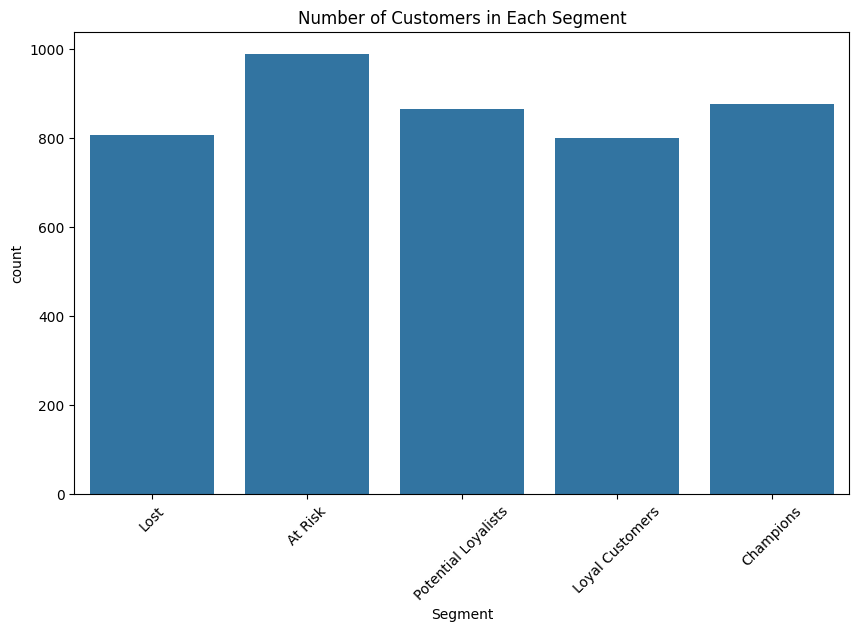

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', order=segment_labels) # Count customers per segment
plt.title('Number of Customers in Each Segment')
plt.xticks(rotation=45) 
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_27924\1694728341.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_mean = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetory']].mean()


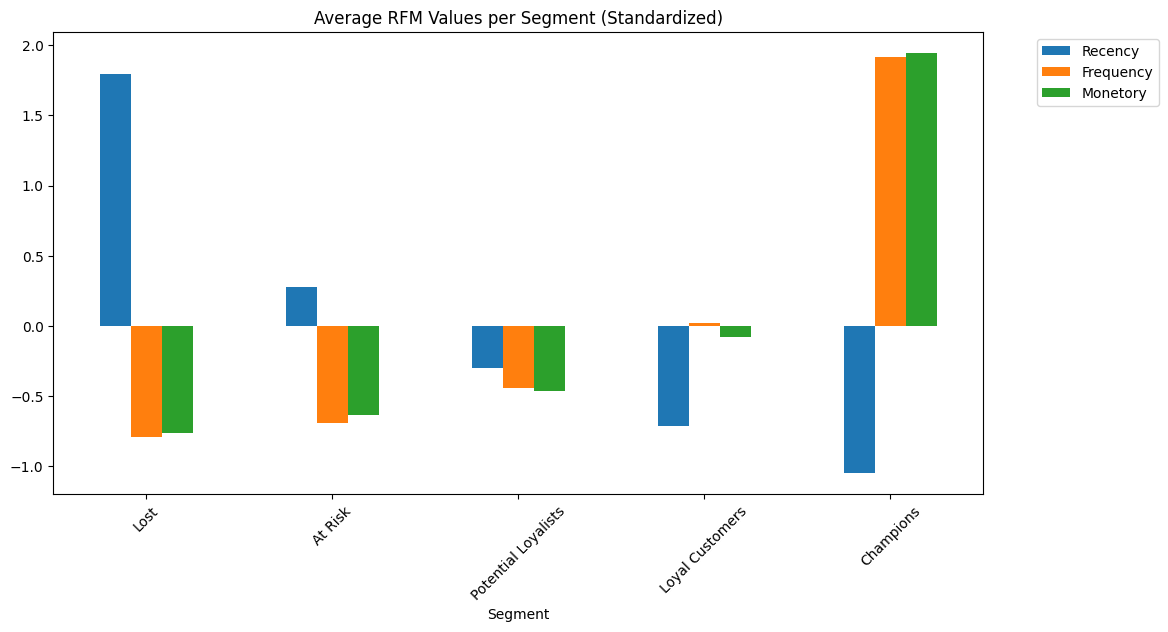

In [53]:
#Compare the average R, F, M values for each segment.
# First, we need to standardize the values to put them on the same scale.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
segment_mean = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetory']].mean()
segment_scaled = pd.DataFrame(scaler.fit_transform(segment_mean),
                              columns=segment_mean.columns,
                              index=segment_mean.index)
# Now plot the scaled values
segment_scaled.plot(kind='bar', figsize=(12, 6))
plt.title('Average RFM Values per Segment (Standardized)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

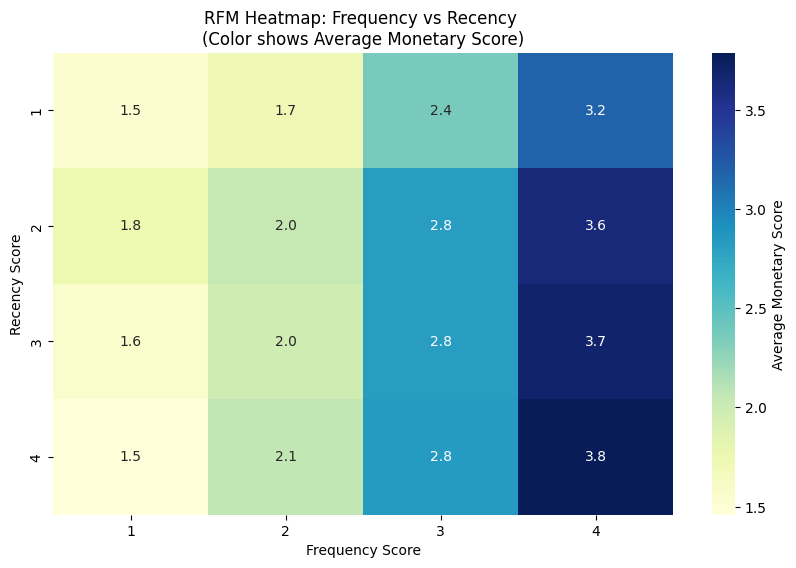

In [54]:
#A powerful way to see the relationship between Recency and Frequency.
# The color shows the average Monetary value for that combination.
rfm_crosstab = pd.crosstab(index=rfm['R_Score'].astype(int),
                           columns=rfm['F_Score'].astype(int),
                           values=rfm['M_Score'].astype(int),
                           aggfunc='mean') # The average M score for each R/F cell

plt.figure(figsize=(10, 6))
sns.heatmap(rfm_crosstab, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Average Monetary Score'})
plt.title('RFM Heatmap: Frequency vs Recency \n(Color shows Average Monetary Score)')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
